In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from sklearn.preprocessing import Imputer,StandardScaler,Normalizer
from sklearn.ensemble import RandomForestRegressor

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:
data=pd.read_csv("train.csv")
vish=data[:100000]
visl=data[:1000]
#data=data[:100000]

In [8]:

#24 columns and 341424 rows
data.info()
#14 numerical & 9 categorical
#target numerical(regression)
data.isnull().sum()
#Null values==season_holidayed_code>> 114 & state_code_residence 4764
data.iloc[:,9:].describe(include="all")
#reservation_id > all unique no need*
data=data.drop(["reservation_id","booking_date"],axis=1)
#checking date and checkout date > can be used to do feature engineering  
#channel_code > range(1-3)
#main_product_code > range(1-3)
#no. of adults > 1-32
#children > 1-13
#id > 45-4995
#resort region > 1-3
#resort type > 1-7
#room type > 1-6
#nights > -45 - 60 (minus seems to be fishy)*
#season > 1-38
#starcode residence 1-38
#starcode resort > 1-13
#total_pax > 1-24
#member age > categorical (D is predominant)
#member id > one third is unique 
#cluster code > categorical(6 unique)
#reservation status code > categorical (4 unique)
#"" id > 32 unique one
#amount[TARGET] > 1- 10.8 amount

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 24 columns):
reservation_id                        341424 non-null object
booking_date                          341424 non-null object
checkin_date                          341424 non-null object
checkout_date                         341424 non-null object
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341310 non-null float64
state_code_residence                  33666

In [9]:
print(data.loc[data["channel_code"]==2])#to get specific value of a column

       checkin_date checkout_date  channel_code  main_product_code  \
10         28/02/17      01/03/17             2                  1   
11         18/10/17      20/10/17             2                  1   
13         06/04/18      08/04/18             2                  1   
16         06/04/18      07/04/18             2                  1   
23         19/01/18      22/01/18             2                  1   
30         28/04/17      29/04/17             2                  2   
50         06/04/18      07/04/18             2                  2   
57         28/08/17      30/08/17             2                  2   
90         24/11/17      25/11/17             2                  2   
92         06/04/18      08/04/18             2                  2   
93         06/05/17      09/05/17             2                  2   
95         21/10/17      22/10/17             2                  2   
96         03/04/18      06/04/18             2                  2   
97         08/04/18 

In [10]:
data.head(10)

,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,05/04/18,06/04/18,3,1,2,0,46,3,3,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,11/04/15,16/04/15,1,1,2,0,46,3,3,4,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,01/02/15,05/02/15,1,1,2,0,47,1,5,4,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,11/06/15,16/06/15,1,1,2,2,46,2,2,3,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,14/12/15,19/12/15,1,1,2,0,46,2,2,4,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346
5,12/01/16,13/01/16,1,1,2,0,47,1,1,4,...,7.0,6,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,8.167707
6,20/01/16,21/01/16,3,1,2,0,46,2,7,4,...,7.0,9,1,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ff...,6.449838
7,20/10/16,25/10/16,1,1,2,2,46,1,1,2,...,7.0,6,4,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,7.046172
8,18/09/16,24/09/16,1,1,2,0,45,2,4,3,...,7.0,10,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,0b918943df0962bc7a1824c0555a389347b4febdc7cf9d...,5.394203
9,21/11/16,24/11/16,1,1,2,0,45,1,5,4,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,6.561412


In [11]:
data["checkin_date"]=pd.to_datetime(data["checkin_date"],dayfirst=True)
data["checkout_date"]=pd.to_datetime(data["checkout_date"],dayfirst=True)
r=data["checkout_date"]-data["checkin_date"]
data["overall_days"]=r.dt.days
y_data=data["amount_spent_per_room_night_scaled"]

In [12]:
l=["checkin_date","checkout_date","memberid","amount_spent_per_room_night_scaled","state_code_residence","state_code_resort","reservationstatusid_code"]
x_data=data.drop(l,axis=1)

In [13]:
x_data["Total persons"]=x_data["numberofadults"]+x_data["numberofchildren"]


In [14]:
x_data=pd.get_dummies(x_data,columns=["persontravellingid","member_age_buckets","cluster_code","resort_id"],drop_first=True)

In [15]:
imp = Imputer(missing_values=np.NaN,strategy='most_frequent')
x_data["season_holidayed_code"]=imp.fit_transform(x_data["season_holidayed_code"].values.reshape(-1, 1))

3     2963
2     2070
4     1715
6     1276
1      498
8      430
5      409
9      175
12     133
7      101
10      96
16      32
15      27
14      22
18      16
11       7
24       6
20       6
13       5
37       5
25       2
21       2
26       1
34       1
17       1
22       1
Name: roomnights, dtype: int64


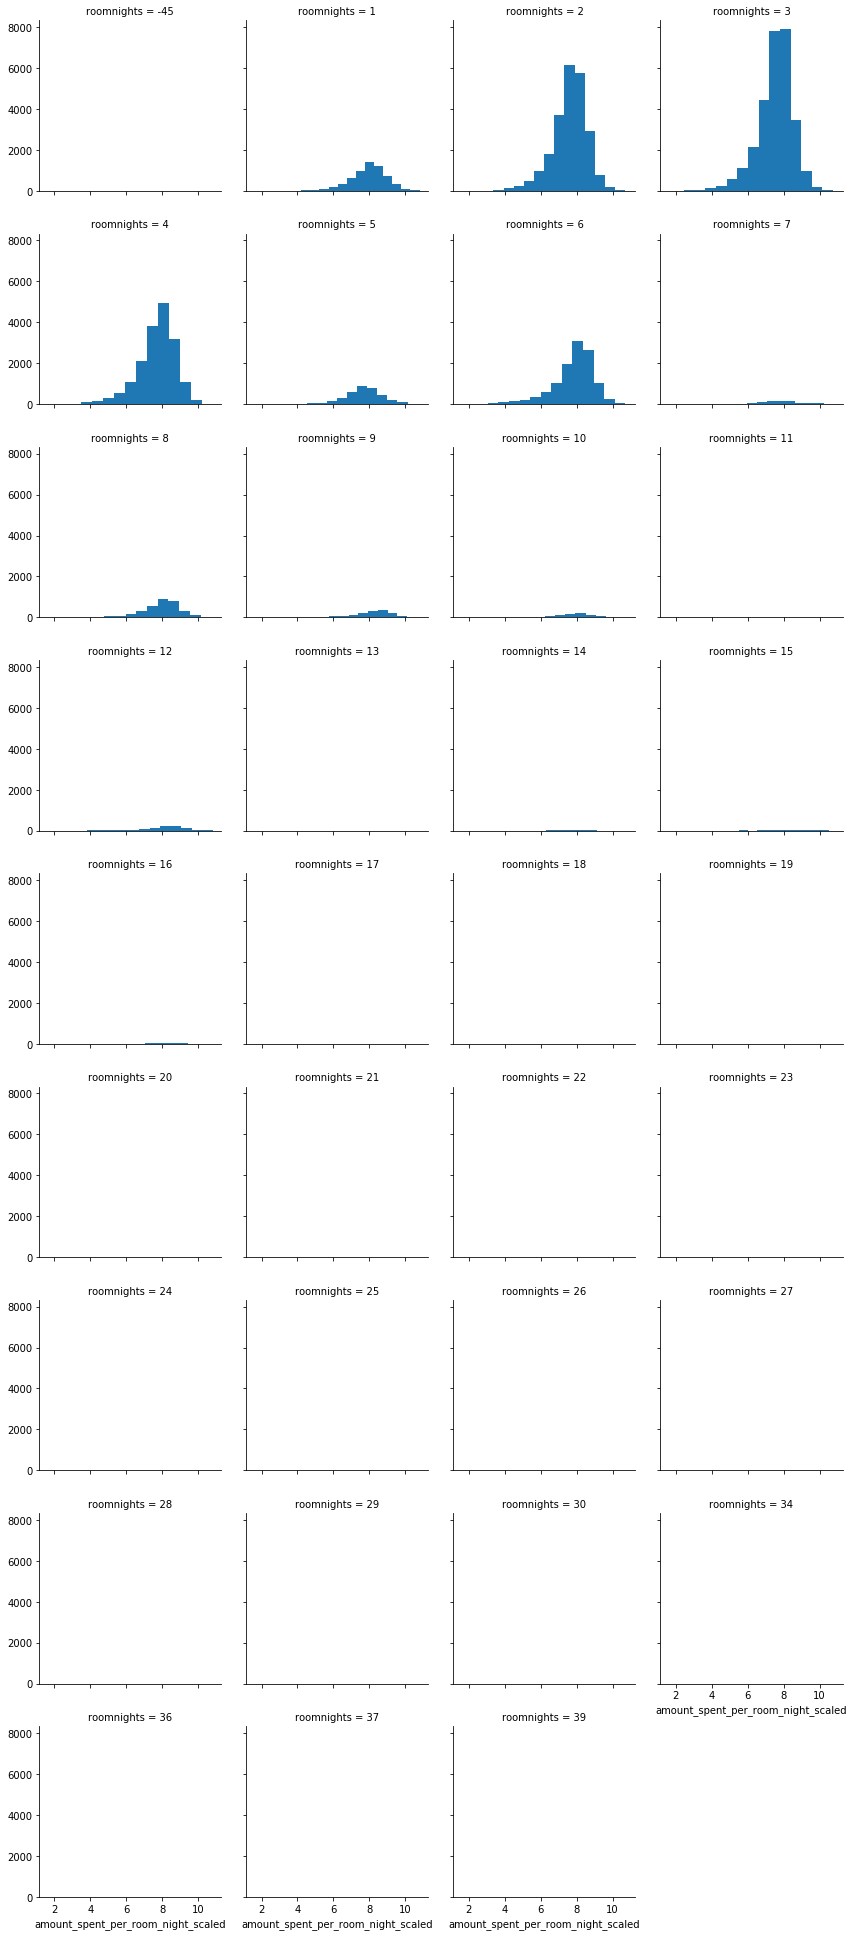

In [39]:
# #print(data["channel_code"].value_counts())
# g=sns.FacetGrid(vish,col="channel_code")
# g.map(plt.hist,"amount_spent_per_room_night_scaled",bins=15)
# # #channel plays an important role 1>3>2*

# #data["main_product_code"].value_counts()
# g1=sns.FacetGrid(vish,col="main_product_code")
# g1.map(plt.hist,"amount_spent_per_room_night_scaled",bins=15)
# #product code 7 has high amount spend

# #data["numberofadults"].value_counts()
# g2=sns.FacetGrid(vish,col="numberofadults",col_wrap=4)
# g2.map(plt.hist,"amount_spent_per_room_night_scaled",bins=15)

print(x_data["roomnights"].value_counts())
g2=sns.FacetGrid(vish,col="roomnights",col_wrap=4)
g2.map(plt.hist,"amount_spent_per_room_night_scaled",bins=15)



In [ ]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,fmt=".2f",cmap="winter")

In [14]:
r_data=x_data.copy()
r_data["amount_spent_per_room_night_scaled"]=y_data
r_data

,channel_code,main_product_code,numberofadults,numberofchildren,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,total_pax,...,resort_id_c6f3ac57944a531490cd39902d0f777715fd005efac9a30622d5f5205e7f6894,resort_id_c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf9b2ade051f0775ac4,resort_id_d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35,resort_id_da4ea2a5506f2693eae190d9360a1f31793c98a1adade51d93533a6f520ace1c,resort_id_e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b,resort_id_e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683,resort_id_ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d,resort_id_f5ca38f748a1d6eaf726b8a42fb575c3c71f1864a8143301782de13da2d9202b,resort_id_ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a,amount_spent_per_room_night_scaled
0,3,1,2,0,3,3,3,1,2.0,3,...,0,0,0,0,0,0,0,0,0,7.706428
1,1,1,2,0,3,3,4,5,2.0,2,...,0,0,0,0,0,0,0,0,0,6.662563
2,1,1,2,0,1,5,4,4,2.0,2,...,0,0,0,0,0,0,0,0,0,7.871602
3,1,1,2,2,2,2,3,5,2.0,2,...,0,0,1,0,0,0,0,0,0,5.344943
4,1,1,2,0,2,2,4,5,2.0,2,...,0,0,1,0,0,0,0,0,0,7.059346
5,1,1,2,0,1,1,4,2,2.0,2,...,0,0,0,0,0,0,0,0,0,8.167707
6,3,1,2,0,2,7,4,1,3.0,1,...,0,0,0,0,0,0,0,0,1,6.449838
7,1,1,2,2,1,1,2,5,3.0,4,...,0,0,0,0,0,0,0,0,0,7.046172
8,1,1,2,0,2,4,3,6,4.0,2,...,0,0,0,0,0,0,0,0,0,5.394203
9,1,1,2,0,1,5,4,4,3.0,2,...,0,0,0,0,0,0,0,0,0,6.561412


In [15]:
x_data.columns

Index(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'resort_region_code', 'resort_type_code',
       'room_type_booked_code', 'roomnights', 'season_holidayed_code',
       'total_pax', 'booking_type_code', 'overall_days', 'Total persons',
       'persontravellingid_46', 'persontravellingid_47',
       'persontravellingid_4752', 'persontravellingid_4753',
       'persontravellingid_4995', 'member_age_buckets_B',
       'member_age_buckets_C', 'member_age_buckets_D', 'member_age_buckets_E',
       'member_age_buckets_F', 'member_age_buckets_G', 'member_age_buckets_H',
       'member_age_buckets_I', 'member_age_buckets_J', 'cluster_code_B',
       'cluster_code_C', 'cluster_code_D', 'cluster_code_E', 'cluster_code_F',
       'resort_id_39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac8f9e9a2596173f80c9',
       'resort_id_3e1e967e9b793e908f8eae83c74dba9bcccce6a5535b4b462bd9994537bfe15c',
       'resort_id_3fdba35f04dc8c462986c992bcf875546257113072a909c162

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
l=["channel_code","main_product_code","room_type_booked_code","season_holidayed_code","total_pax","booking_type_code"]
x_data[l]=scaler.fit_transform(x_data[l])

In [17]:
x_data

,channel_code,main_product_code,numberofadults,numberofchildren,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,total_pax,...,resort_id_b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9,resort_id_c6f3ac57944a531490cd39902d0f777715fd005efac9a30622d5f5205e7f6894,resort_id_c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf9b2ade051f0775ac4,resort_id_d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35,resort_id_da4ea2a5506f2693eae190d9360a1f31793c98a1adade51d93533a6f520ace1c,resort_id_e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b,resort_id_e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683,resort_id_ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d,resort_id_f5ca38f748a1d6eaf726b8a42fb575c3c71f1864a8143301782de13da2d9202b,resort_id_ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a
0,1.0,0.000000,2,0,3,3,0.4,1,0.333333,0.125000,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.000000,2,0,3,3,0.6,5,0.333333,0.083333,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.000000,2,0,1,5,0.6,4,0.333333,0.083333,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.000000,2,2,2,2,0.4,5,0.333333,0.083333,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0.000000,2,0,2,2,0.6,5,0.333333,0.083333,...,0,0,0,1,0,0,0,0,0,0
5,0.0,0.000000,2,0,1,1,0.6,2,0.333333,0.083333,...,1,0,0,0,0,0,0,0,0,0
6,1.0,0.000000,2,0,2,7,0.6,1,0.666667,0.041667,...,0,0,0,0,0,0,0,0,0,1
7,0.0,0.000000,2,2,1,1,0.2,5,0.666667,0.166667,...,1,0,0,0,0,0,0,0,0,0
8,0.0,0.000000,2,0,2,4,0.4,6,1.000000,0.083333,...,0,0,0,0,0,0,0,0,0,0
9,0.0,0.000000,2,0,1,5,0.6,4,0.666667,0.083333,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)


In [19]:
from sklearn.model_selection import train_test_split

x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=0)

In [19]:
x_train.iloc[:,26:]

,member_age_buckets_J,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F,resort_id_39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac8f9e9a2596173f80c9,resort_id_3e1e967e9b793e908f8eae83c74dba9bcccce6a5535b4b462bd9994537bfe15c,resort_id_3fdba35f04dc8c462986c992bcf875546257113072a909c162f7e470e581e278,resort_id_48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c111b49baf362511afc,...,resort_id_b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9,resort_id_c6f3ac57944a531490cd39902d0f777715fd005efac9a30622d5f5205e7f6894,resort_id_c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf9b2ade051f0775ac4,resort_id_d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35,resort_id_da4ea2a5506f2693eae190d9360a1f31793c98a1adade51d93533a6f520ace1c,resort_id_e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b,resort_id_e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683,resort_id_ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d,resort_id_f5ca38f748a1d6eaf726b8a42fb575c3c71f1864a8143301782de13da2d9202b,resort_id_ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a
308202,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311297,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14041,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125124,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21114,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
171907,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55861,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
18266,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11774,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153852,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100,n_jobs=-1)
random_forest.fit(x_train, y_train)
y_predict = random_forest.predict(x_test)


In [22]:
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors =10,n_jobs=-1)
model.fit(x_train, y_train)
print(model.score(x_train,y_train))

y_predict = model.predict(x_test)

0.2459957894475879


In [ ]:
# from sklearn.svm import SVR
# SVM_model=SVR(kernel='linear',C=1)
# SVM_model.fit(x_train,y_train)
# SVM_model.score(x_train,y_train)
# y_predict = SVM_model.predict(x_test)

In [138]:
#96 accuracy model n_estimators=260, num_leaves=28, max_depth=6
#1
lgb_model = lgb.LGBMRegressor(n_estimators=260, num_leaves=28, max_depth=6)
# %time lgb_model.fit(X_train, y_train)
# 100 * mean_squared_error(y_test, lgb_model.predict(X_test))
%time scores = -100 * cross_val_score(lgb_model, train_processed, y, cv=3, scoring='neg_mean_squared_error')
print(scores, scores.mean())
#2
small_lgb_model = lgb.LGBMRegressor()
%time small_lgb_model.fit(X_train, y_train)
100 * mean_squared_error(y_test, small_lgb_model.predict(X_test))




NameError: name 'lgb' is not defined

>Insights from winners
check lgm and catboost regressor
check with k-fold cross validation


In [20]:
from sklearn.linear_model import Ridge
model=Ridge(alpha=0.5)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

In [140]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = Ridge(alpha=0.5), X = x_train,
                                                   y = y_train, train_sizes = [50, 80, 110], cv = 2)

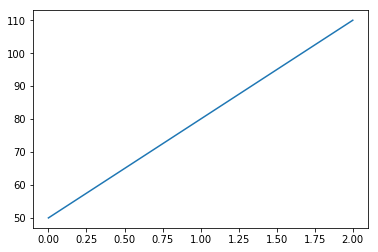

In [136]:
plt.plot(train_sizes)


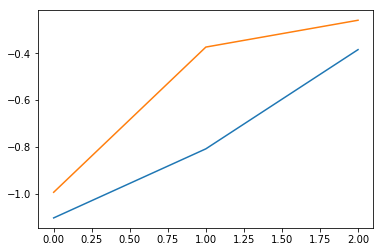

In [141]:
plt.plot(validation_scores)

In [35]:
print(x_train.shape,x_val.shape,x_test.shape)

(238996, 63) (51214, 63) (51214, 63)


>Neural network

In [2]:
from keras.models import Sequential
from keras.layers import Dense

C:\Users\vijay\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [47]:
model=Sequential([
                Dense(32,activation="tanh",input_shape=(63,)),
                Dense(32,activation="tanh"),
                Dense(1)])
model.compile(optimizer="rmsprop",loss="mse")

In [49]:
hist=model.fit(x_train,y_train,batch_size=10000,epochs=5,validation_data=(x_val,y_val))

Train on 238996 samples, validate on 51214 samples
Epoch 1/5
238996/238996 [==============================] - 1s 4us/step - loss: 1.2065 - val_loss: 1.1663
Epoch 2/5
238996/238996 [==============================] - 1s 4us/step - loss: 1.1494 - val_loss: 1.1205
Epoch 3/5
238996/238996 [==============================] - 1s 4us/step - loss: 1.1048 - val_loss: 1.0825
Epoch 4/5
238996/238996 [==============================] - 1s 4us/step - loss: 1.0750 - val_loss: 1.0603
Epoch 5/5
238996/238996 [==============================] - 1s 4us/step - loss: 1.0551 - val_loss: 1.0486


In [67]:
hist.history.keys()#it will be diff for classification problem['acc', 'loss', 'val_acc', 'val_loss']

dict_keys(['val_loss', 'loss'])

<Figure size 720x720 with 0 Axes>

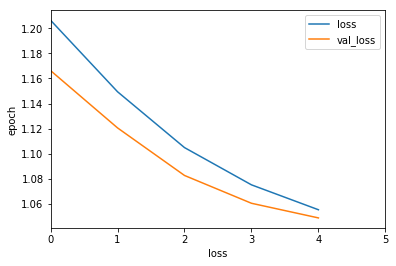

<Figure size 720x720 with 0 Axes>

In [69]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.xlabel("loss")
plt.ylabel("epoch")
plt.legend(["loss","val_loss"])
plt.xlim(0,5)
plt.figure(figsize=(10,10))

In [53]:
model.evaluate(x_test,y_test)

51214/51214 [==============================] - 4s 84us/step


1.0571338102968089

In [21]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_predict,y_test)

import math
rmse=math.sqrt(mse)
rmse

1.0071363397342312

In [19]:
y_test.head(10)

9394    8.561620
898     7.606597
2398    6.780569
5906    8.817702
2343    9.114491
8225    6.959949
5506    3.506658
6451    6.589820
2670    7.726376
3497    8.989050
Name: amount_spent_per_room_night_scaled, dtype: float64

In [ ]:
y_predict[:10]

>Test dataset prediction

In [ ]:
t=pd.read_csv("sample_submission.csv")

In [28]:
test=pd.read_csv("test.csv")
test.head(10)
len(test["resort_id"].unique())

32

In [25]:
test["checkin_date"]=pd.to_datetime(test["checkin_date"],dayfirst=True)
test["checkout_date"]=pd.to_datetime(test["checkout_date"],dayfirst=True)
r=test["checkout_date"]-test["checkin_date"]
test["overall_days"]=r.dt.days

In [26]:
l=["checkin_date","checkout_date","memberid","reservation_id","booking_date","state_code_residence","state_code_resort","reservationstatusid_code"]
test=test.drop(l,axis=1)

In [33]:
test.isnull().sum()

channel_code                  0
main_product_code             0
numberofadults                0
numberofchildren              0
resort_region_code            0
resort_type_code              0
room_type_booked_code         0
roomnights                    0
season_holidayed_code         0
total_pax                     0
booking_type_code             0
overall_days                  0
persontravellingid_46         0
persontravellingid_47         0
persontravellingid_4752       0
persontravellingid_4753       0
persontravellingid_4995       0
member_age_buckets_B          0
member_age_buckets_C          0
member_age_buckets_D          0
member_age_buckets_E          0
member_age_buckets_F          0
member_age_buckets_G          0
member_age_buckets_H          0
member_age_buckets_I          0
member_age_buckets_J          0
cluster_code_B                0
cluster_code_C                0
cluster_code_D                0
cluster_code_E                0
cluster_code_F                0
reservat

In [28]:
test=pd.get_dummies(test,columns=["persontravellingid","member_age_buckets","cluster_code"],drop_first=True)


In [30]:
test=pd.get_dummies(test,columns=["reservationstatusid_code"])

In [31]:
imp = Imputer(missing_values=np.NaN,strategy='most_frequent')
test["season_holidayed_code"]=imp.fit_transform(test["season_holidayed_code"].values.reshape(-1, 1))

In [32]:
y_predict=model.predict(test)

In [36]:
prediction = pd.DataFrame(y_predict, columns=["amount_spent_per_room_night_scaled"]).to_csv('predict.csv',index=False)